$\textbf{1.) Posterior, Bayes Formula }$

$P(\theta |  D)  = \frac{P(D | \theta) P(\theta) }{P(D)}$

wher $P(\theta |  D)$ is the posterior, $P(D | \theta)$ is the likeliood and $ P(\theta)$ is the prior. $P(D)$ is the evidence of the data



$\textbf{2.) Generating normal distibution with $\mu$ = 10, $\sigma$ =3 }$

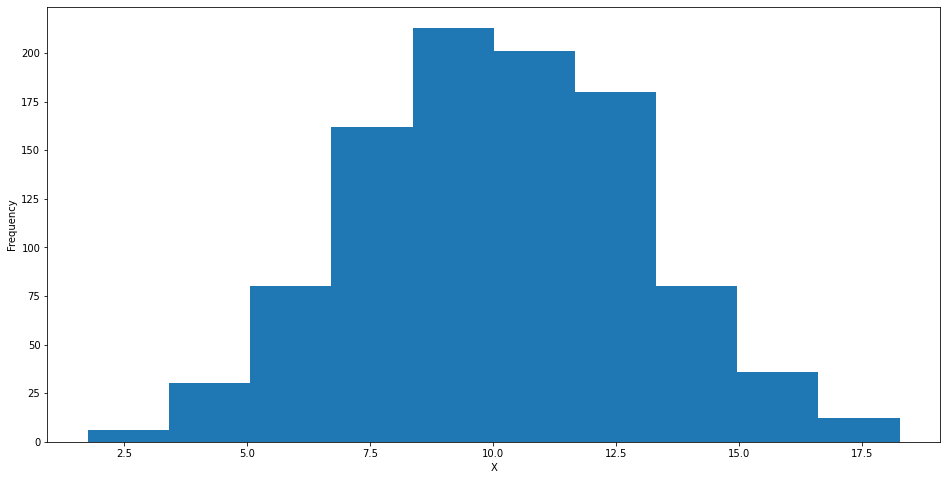

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1000)

D_array = np.random.normal(10, 3, 1000)

plt.figure(figsize=(16,8))
plt.hist(x)
plt.xlabel('X')
plt.ylabel('Frequency')
plt.show()


$\textbf{3.) Creating a function for prior}$

This function will return 1 if the value of $\sigma$ >0 and will return 0 otherwise. We check this funcction for the above values of $\mu$ and $\sigma$

In [ ]:
def prior_theta(mu,sigma):
  if sigma>0:
    return 1.0
  else:
    return 0.0

  

In [ ]:
prior_theta(10,3)


1.0

$\textbf{4.) Transition Model Q($\sigma_{current}$, $\sigma_{new}$) = N($\sigma_{current}$,1)}$


\\


i.e the probability of $\sigma$, going from, $\sigma_{current}$ to $\sigma_{new}$ is normally distributed as above. We can create a python function which calculates this probability as follows. 

In [ ]:
def Q_curr_new(sigma_curr):
  return np.random.normal(sigma_curr, 1)


$\textbf{5.) Calculating log-likelihood function}$

$P(D|\mu_{obs}, \sigma_a) =  \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma_a^2}}\exp(\frac{-1}{2\sigma_a^2} (d_i-\mu_{obs})^2) $

Taking log on both sides, we get the log-likelihood as follows


$L(D|\mu_{obs}, \sigma_a) = \log(P(D|\mu_{obs}, \sigma_a)) $

$\qquad \qquad \qquad= \sum_{i=1}^{n} \log [ \frac{1}{\sqrt{2\pi\sigma_a^2}}\exp(\frac{-1}{2\sigma_a^2} (d_i-\mu_{obs})^2)]$

$\qquad \qquad \qquad= \sum_{i=1}^{n}[ \ \ [\frac{-1}{2}\log(2\pi\sigma_a^2)] - \ \ \frac{1}{2\sigma_a^2} (d_i-\mu_{obs})^2 ] $

$\qquad \qquad \qquad= \frac{-n}{2}\log(2\pi\sigma_a^2) - \frac{1}{2\sigma_a^2} \sum_{i=1}^{n}(d_i-\mu_{obs})^2 $

*Taking logatithms makes us easy to track the solution analytically. We can differentiate with respect to $\sigma$ and equate the derivative to 0, to get the maximum likelihood estimator. All the product terms in the previous equations are converted to summations after taking log. And since logarithms is a monotonically increasing function it does not change the minima or maxima of the original function.*


In [ ]:
import math

def calculate_log_likelihood(mu,sigma,data_points_array):
  assert type(data_points_array) is np.ndarray
  n = len(data_points_array)
  L = -0.5*n*(np.log(2*math.pi*(sigma**2))) - 0.5*(sigma**(-2))*sum((data_points_array - mu)**2)
  return L 
    


$\textbf{6.) Acceptance probability $a(\theta_{current}, \theta{new})$}$

$a(\theta_{current}, \theta{new}) = \min\{1 , \frac{P(D|\theta_{new}) P(\theta_{new})}{P(D|\theta_{current}) P(\theta_{current})} \}$

$\qquad \qquad \qquad \ \ \ \ =  \min\{1 , \frac{\exp(L(D|\theta_{new})) \ \ P(\theta_{new})}{\exp(L(D|\theta_{current})) P(\theta_{current})} \} $

We can now create a python function which calculate the acceptance probability this way

In [ ]:
def acceptance_curr_new(data_array, mu, sigma_new, sigma_current):
  assert type(data_array) is np.ndarray


  a = np.exp(calculate_log_likelihood(mu,sigma_new,data_array)) * prior_theta(mu, sigma_new)
  b = np.exp(calculate_log_likelihood(mu,sigma_current,data_array)) * prior_theta(mu, sigma_current)

  if (a<=0):
    res = 0
  elif (b<=0):
    res = 1
  else:
    res = min(1,a/b)
  
  u = np.random.rand()

  if (res==1):
    return True
  elif(u <=res):
    return True
  else:
    return False




$\textbf{7.) Running 25000 iterations with initial $\theta$ = (10,0.1) and plotting the accepte and not accepted values  }$

In [ ]:
def get_accepted_rejected_iter(initial_mu, initial_sigma, data, number_iter):
  accepted_sig = []
  rejected_sig = []
  current = initial_sigma
  for i in range(number_iter):
    new = Q_curr_new(current)
    a_or_r = acceptance_curr_new(data,initial_mu,new,current)
    
    if (a_or_r==True):
      accepted_sig.append(new)
    else:
      rejected_sig.append(new)

    current = new
  
  return accepted_sig, rejected_sig
    


In [ ]:
initial_mu = 10
initial_sig = 2
n_iter = 25000
accepted, rejected = get_accepted_rejected_iter(initial_mu, initial_sig ,D_array,n_iter)

len(accepted)

0

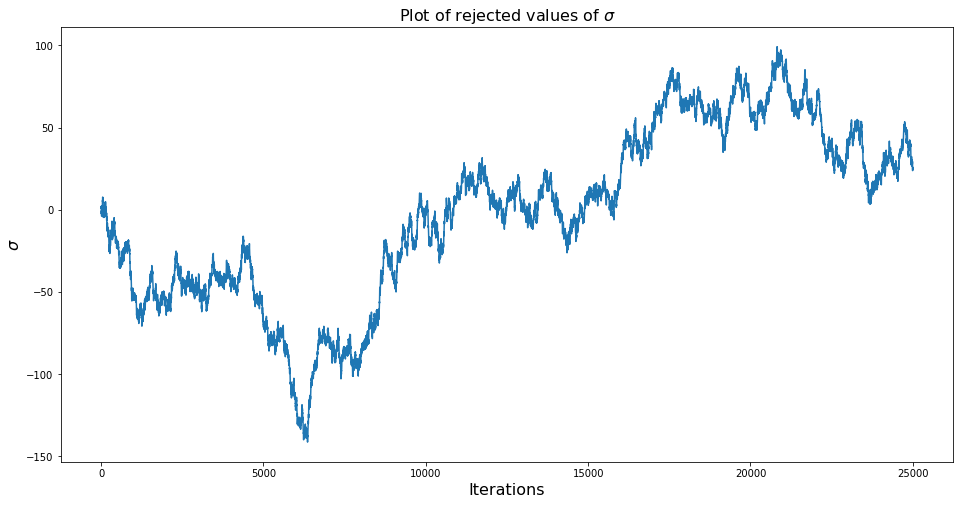

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.plot(np.arange(len(rejected)), np.array(rejected))
plt.title('Plot of rejected values of $\sigma$ ' , fontsize=16)
plt.xlabel('Iterations', fontsize=16)
plt.ylabel('$ \sigma $', fontsize=16)
plt.show()


$\textbf{8.) Plot of accepted values : No accepted value possible if we only accept when a = 1. Hecnce we cannot plot anything in this question.  }$

$\textbf{9.) When $\mu$ and $\sigma$ are both unknown. We redefine the prior.   }$

In [ ]:
from scipy.stats import uniform

def prior_bivariate(mu, sigma):
  if (sigma<=0):
    return 0
  elif (mu<5) or (mu>15):
    return 0
  else:
    return uniform.pdf(mu,5,15)




In [ ]:
def Q_curr_to_new_bivariate(mu_curr, sig_curr):
  return np.random.multivariate_normal([mu_curr, sig_curr], np.identity(2))


def acceptance_curr_new_bivariate(data_array, mu_current, mu_new, sigma_current, sigma_new):
  assert type(data_array) is np.ndarray


  a = np.exp(calculate_log_likelihood(mu_new,sigma_new,data_array)) * prior_bivariate(mu_new, sigma_new)
  b = np.exp(calculate_log_likelihood(mu_current,sigma_current,data_array)) * prior_bivariate(mu_current, sigma_current)

  if (a<=0):
    res = 0
  elif (b<=0):
    res = 1
  else:
    res = min(1,a/b)
  
  u = np.random.rand()

  if (res==1):
    return True
  elif(u <=res):
    return True
  else:
    return False


In [ ]:
def get_accepted_rejected_iter_bivariate(initial_mu, initial_sigma, data, number_iter):
  accepted_sig = []
  rejected_sig = []

  accepted_mu = []
  rejected_mu = []

  current_mu = initial_mu
  current_sigma = initial_sigma

  for i in range(number_iter):
    new_mu = Q_curr_to_new_bivariate(current_mu, current_sigma)[0]
    new_sigma = Q_curr_to_new_bivariate(current_mu, current_sigma)[1]

    a_or_r = acceptance_curr_new_bivariate(data,current_mu,new_mu, current_sigma, new_sigma)
    
    if (a_or_r==True):
      accepted_mu.append(new_mu)
      accepted_sig.append(new_sigma)
    else:
      rejected_mu.append(new_mu)
      rejected_sig.append(new_sigma)
     
    current_mu = new_mu
    current_sigma = new_sigma
  
  return accepted_mu, rejected_mu, accepted_sig, rejected_sig
    


$\textbf{10.) Using initial value and plotting. No value accepted so plotting only rejected value.}$

In [ ]:
initial_mu_biv = 5
initial_sig_biv = 0.1
n_iter = 25000

a_mu, r_mu, a_sig, r_sig = get_accepted_rejected_iter_bivariate(initial_mu_biv, initial_sig_biv,D_array , n_iter)

print('No. of accepted $\mu$ :' ,len(a_mu))
print('No. of accepted $\sigma$ :' , len(a_sig))


No. of accepted $\mu$ : 0
No. of accepted $\sigma$ : 0


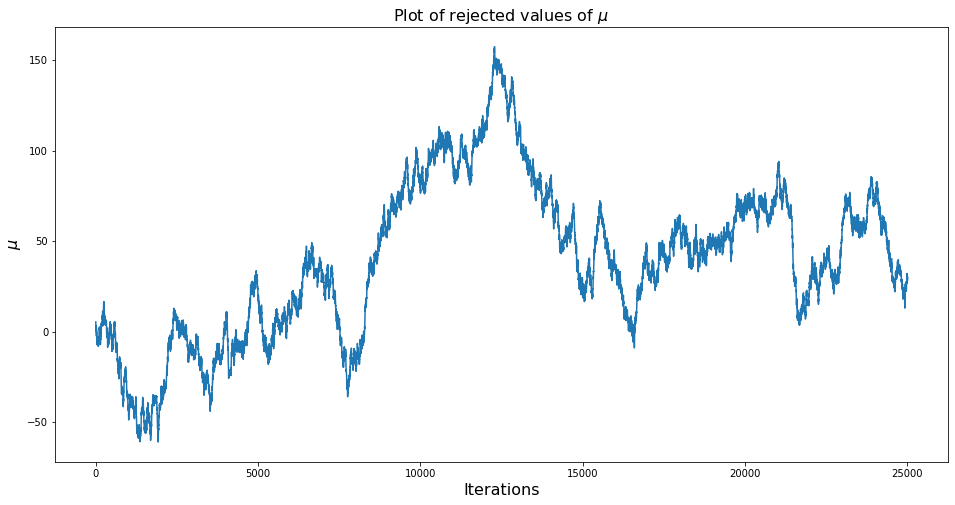

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(np.arange(len(r_mu)), np.array(r_mu))
plt.title('Plot of rejected values of $\mu $ ' , fontsize=16)
plt.xlabel('Iterations', fontsize=16)
plt.ylabel('$ \mu $', fontsize=16)
plt.show()


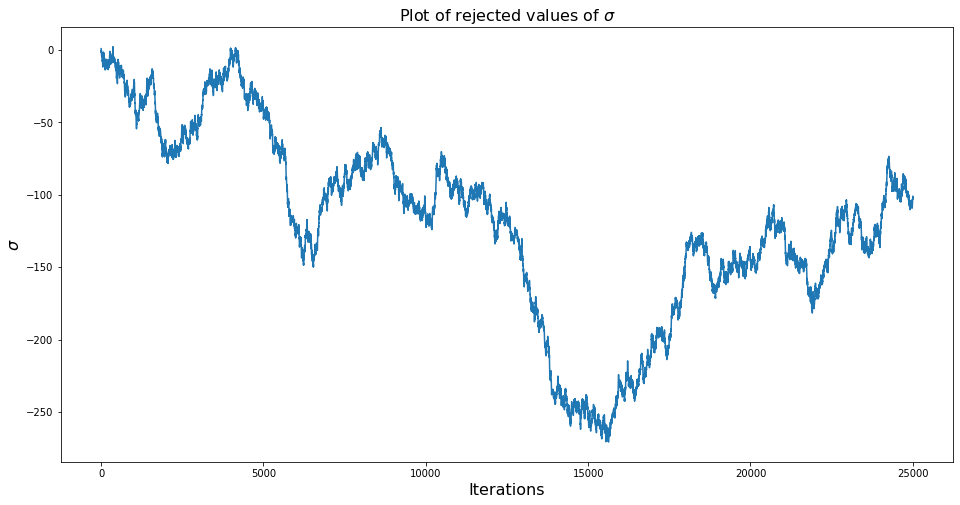

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(np.arange(len(r_sig)), np.array(r_sig))
plt.title('Plot of rejected values of $\sigma $ ' , fontsize=16)
plt.xlabel('Iterations', fontsize=16)
plt.ylabel('$ \sigma $', fontsize=16)
plt.show()
